In [1]:
import numpy as np
import pandas as pd


import random
import os
from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt

from astropy.visualization import make_lupton_rgb
plt.style.use('dark_background')

In [2]:
filepath = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/results/data/'
hdu_list = fits.open(filepath + 'Unique_positives_complete.fits')
print(len(hdu_list[1].data))
images = hdu_list[1].data
images = images[:,0:3,:,:]
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()

20642


In [3]:
#PNG for proposal
best = pd.read_csv('best.csv')

ind = data['COADD_OBJECT_ID'].isin(best['COADD_OBJECT_ID'])
images_best = images[ind]
data_best = data.loc[ind]

#best candidates
N = 49
images_best = images_best[-N:]
data_best = data_best.tail(N)
data_best = data_best.reset_index(drop=True)

In [4]:
def make_plot_proposal(objects, title, data):
    #print(title)
    plt.figure(figsize=(10.2,10))
    ids = pd.read_csv('organized_ids.csv')
    for n in range(len(ids)):
        data_tmp = data[data['COADD_OBJECT_ID'] == ids['ID'].iloc[n]]
        img_tmp = objects[data_tmp.index][0]
        
        plt.subplot(7, 7, n+1)
        plt.subplots_adjust(wspace=0.15, hspace=0.15)#9, 90, (2, 2, 2)
        rgb = make_lupton_rgb(img_tmp[2], img_tmp[1], img_tmp[0], Q=9., stretch=90., minimum=(2,2,2))
        plt.imshow(rgb, aspect='equal')
        plt.xticks([], [])
        plt.yticks([], []) 
    #plt.savefig('Image.png', bbox_inches='tight')
    plt.show()

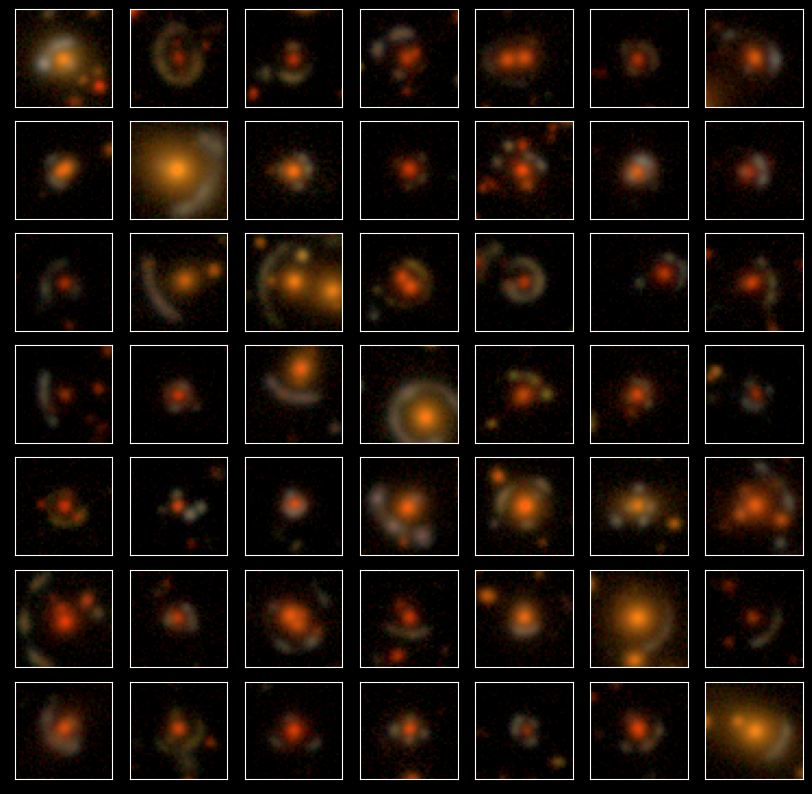

In [5]:
make_plot_proposal(images_best, 'title', data_best)

In [6]:
def make_plot_all(objects, data):
    for i in range(len(objects)):
        """
        plt.figure(figsize=(2.5, 2.5)) #1,1
        mini = (0, 0, 0)
        rgb = make_lupton_rgb(objects[i][2], objects[i][1], objects[i][0], Q=9., stretch=42., minimum=mini)
        plt.imshow(rgb, aspect='equal')
        plt.xticks([], [])
        plt.yticks([], []) 
        plt.show()
        #plt.savefig('Images/'+'Image_'+ str(i) + '.png', bbox_inches='tight')
        """
        
        plt.figure(figsize=(1,1))
        mini = (2, 2, 2)
        rgb = make_lupton_rgb(objects[i][2], objects[i][1], objects[i][0], Q=9., stretch=90., minimum=mini)
        plt.imshow(rgb, aspect='equal')
        plt.xticks([], [])
        plt.yticks([], []) 
        plt.show()
        

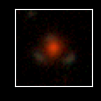

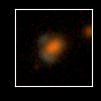

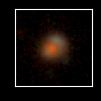

In [7]:
make_plot_all(images_best[0:3], data_best.iloc[0:3])